# 게임 맵 최단거리

## 문제
각 팀은 상대 팀 진영에 최대한 빨리 도착하는 것이 유리, 게임 맵의 상태 maps가 매개변수로 주어질 때, <br>
캐릭터가 상대 팀 진영에 도착하기 위해서 지나가야 하는 칸의 개수의 최솟값을 return
<br><br>
input : 2차원 정수 배열, output : 정수

#### <조건>
 - 상대 팀 진영에 도착할 수 없을 때는 -1을 return
 - maps는 n x m 크기의 게임 맵의 상태가 들어있는 2차원 배열로, n과 m은 각각 1 이상 100 이하의 자연수
 - n과 m은 서로 같을 수도, 다를 수도 있지만, n과 m이 모두 1인 경우는 입력으로 주어지지 않음
 - maps는 0과 1로만 이루어져 있으며, 0은 벽이 있는 자리, 1은 벽이 없는 자리
 - 처음에 캐릭터는 게임 맵의 좌측 상단인 (1, 1) 위치에 있으며, 상대방 진영은 게임 맵의 우측 하단인 (n, m) 위치에 있음
 
#### <예시>
input : [[1,0,1,1,1],[1,0,1,0,1],[1,0,1,1,1],[1,1,1,0,1],[0,0,0,0,1]]	
<br><br>
result : 11
<br><br>
 - 주어진 데이터는 다음과 같음
 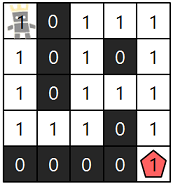
 
 <br>
 - 캐릭터가 적 팀의 진영까지 이동하는 가장 빠른 길은 다음 그림과 같음
 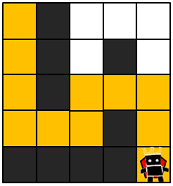
 
 <br>
 - 따라서 총 11칸을 캐릭터가 지나갔으므로 11을 return
 
https://programmers.co.kr/learn/courses/30/lessons/1844

## 풀이
 - 최단경로를 찾아주는 너비 우선 탐색 알고리즘 활용
 - 전진할 때마다 +1을 해줌
 - 너비 우선 탐색을 해주는 find_path 함수 생성
 - 시작 위치인 0,0 과 maps전달
 - 캐릭터가 움직일 수 있는 범위는 4가지로 dist에 저장
 - 인접 리스트를 adj_list에 저장
 - x, y에 현재 위치의 인덱스 번호를 저장하고 4가지 방향으로 이동 했을 때의 위치를 구함 
   - 이때, 미로의 범위를 넘어가는 경우 제외
   - 벽으로 막혀있는 경우 제외
   - 둘을 제외하고 1인경우는 들린적이 없고, 벽도 아닌 위치이기에 처리
     - 이때, 이전의 기록에서 +1을 해줌
     - adj_list에 해당 위치를 추가해줌
 - adj_list가 없어질 때까지 반복해주고 maps의 마지막행의 마지막 열을 return
 - return으로 받은 answer가 1일 경우에는 상대 캐릭터에 도착하지 못한 경우이기에 -1 return
 - 그게 아니라면 answer return

In [50]:
def solution(maps):
    answer = find_path(0,0,maps)
    
    if answer == 1:
        return -1

    return answer
        
def find_path(x, y, maps):
    dist = [[-1, 0], [1, 0], [0, 1], [0, -1]] # 위, 아래, 오른쪽, 왼쪽
    
    adj_list = [(x, y)]
 
    while adj_list:
        x, y = adj_list.pop(0)
    
        for i in dist:
            n_x = x + i[0]
            n_y = y + i[1]

            if n_x < 0 or n_y < 0 or n_x >= len(maps) or n_y >= len(maps[0]):
                continue

            if maps[n_x][n_y] == 0:
                continue

            if maps[n_x][n_y] == 1:
                maps[n_x][n_y] = maps[x][y] + 1
                adj_list.append((n_x, n_y))
  
    return maps[-1][-1]

In [51]:
maps = [[1,0,1,1,1],[1,0,1,0,1],[1,0,1,1,1],[1,1,1,0,1],[0,0,0,0,1]]

solution(maps)

11